# Using the Prebuilt React Agent with LangGraph

In this tutorial, we will use the prebuilt React agent from LangGraph.  The agent will use an external web search tool (Tavily) to respond to user queries.



### Imports
We start by importing the necessary libraries:

In [1]:
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults
from langgraph.prebuilt import create_react_agent

from dotenv import load_dotenv
_ = load_dotenv()


In [2]:
# Initialize the model
model = ChatOpenAI(model="gpt-4o")

### ̉Defining the Tools

We will define two tools:
- Tavily Search tool to fetch relevant information from the web.
- A tool to get the current date and time. This helps the agent to respond to time-based queries.


In [3]:
tavily_search = TavilySearchResults(max_results=5)


In [4]:
from langchain_core.tools import tool
from datetime import datetime

@tool
def get_current_date():
    """Returns the current date and time. Use this tool first for any time-based queries."""
    return f"The current date is: {datetime.now().strftime('%d %B %Y')}"

In [5]:

# list of tools for the agent
tools = [tavily_search, get_current_date]

### Creating the ReAct Agent
Next, we will use LangGraph's prebuilt ReAct agent structure. The agent will use the provided tools (in this case, Tavily Search) when necessary, based on the user's query.

In [6]:
graph = create_react_agent(model, tools)

### Visualizing the Agent's Decision-Making Flow
The ReAct agent has a graph based workflow. We can visualize the workflow using langgraph's in-built graph visualization.


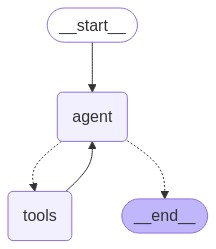

In [7]:
from IPython.display import display, Image

# Visualize the agent's decision-making flow
display(Image(graph.get_graph().draw_mermaid_png()))

### Running the Agent with Queries
Now, we can test our agent with different queries.

In [8]:
# helper function to render markdown
from IPython.display import Markdown, display

def render_markdown(md_string):
    display(Markdown(md_string))

In [9]:
# Helper function to stream the agent's response
def process_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    # return the last message
    return message 

In [10]:
# helper function to process query
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_markdown(f"## Answer:\n{message.content}")


In [11]:
# Query that will trigger the Tavily search tool
process_query("Who won the latest F1 race in Melbourne?")

================================ Human Message =================================

Who won the latest F1 race in Melbourne?


python(60126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_cq6wR4XuZ3MhUKRIb9YozEf0)
 Call ID: call_cq6wR4XuZ3MhUKRIb9YozEf0
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 04 April 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_BUjXTTutNCEzo8ZQocypOBZh)
 Call ID: call_BUjXTTutNCEzo8ZQocypOBZh
  Args:
    query: F1 Melbourne race winner April 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://en.wikipedia.org/wiki/2025_Australian_Grand_Prix", "content": "Lando Norris in the McLaren won the race from pole position, ahead of Max Verstappen in the Red Bull and George Russell in the Mercedes. Norris' victory marked McLaren's first at Melbourne since Jenson Button's victory in 2

## Answer:
Lando Norris won the latest F1 race in Melbourne, driving for McLaren. He secured the victory from pole position, finishing ahead of Max Verstappen in the Red Bull and George Russell in the Mercedes.

In [12]:
# Query that will trigger the Tavily search tool
process_query("What is the weather in Rouse Hill, NSW tomorrow?")

================================ Human Message =================================

What is the weather in Rouse Hill, NSW tomorrow?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_zHUZ4k4Y6qWwk4UT7fEffgCH)
 Call ID: call_zHUZ4k4Y6qWwk4UT7fEffgCH
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 04 April 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_McTlqVPtuDEy2Jx3TZXzcQ46)
 Call ID: call_McTlqVPtuDEy2Jx3TZXzcQ46
  Args:
    query: Rouse Hill NSW weather forecast April 5 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.qweather.com/en/weather30d/rouse-hill-4DD6D.html", "content": "New South Wales - Australia   2025-04-04   Friday   -33.68S, 150.92E\n\nRouse H

## Answer:
The weather forecast for Rouse Hill, NSW on Saturday, April 5, 2025, is expected to have a chance of fog in the early morning, followed by a sunny day. The temperature will reach a high of 25°C.

In [13]:
# Query that will trigger the Tavily search tool
process_query("Is it colder in Brisbane or Sao Paoulo today?")

================================ Human Message =================================

Is it colder in Brisbane or Sao Paoulo today?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_k1Tp2GxXDT0OJpwck1XQ6hdj)
 Call ID: call_k1Tp2GxXDT0OJpwck1XQ6hdj
  Args:
  tavily_search_results_json (call_1BENrRkZk5jx6cI5qIcFixgl)
 Call ID: call_1BENrRkZk5jx6cI5qIcFixgl
  Args:
    query: Brisbane weather today
  tavily_search_results_json (call_hfUOVEIMBMw1K4IdFf3VA7hH)
 Call ID: call_hfUOVEIMBMw1K4IdFf3VA7hH
  Args:
    query: Sao Paulo weather today
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Sao Paulo', 'region': 'Sao Paulo', 'country': 'Brazil', 'lat': -23.5333, 'lon': -46.6167, 'tz_id': 'America/Sao_Paulo', 'localtime_epoch': 1743760816, 'localtime': '2025-04-04 07:00'}, 'current': {'last_

## Answer:
Today, the weather in Brisbane is approximately 23.3°C (73.9°F) with overcast conditions, while in São Paulo, it is about 21.2°C (70.2°F) with misty conditions. Therefore, it is slightly colder in São Paulo compared to Brisbane today.

### Conclusion 

Congratulations on using a prebuilt ReAct agent with LangGraph!

Here are a few things you can try next:
- Try updating the prompts for the agent to see how it responds to different queries.
- Integrate the agent with additional tools, such as the Python Executor, to enable it to perform calculations.
